In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

2.Check the first few samples, shape, info of the data and try to familiarize
yourself with different features

In [104]:

df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [15]:
df.shape

(18207, 60)

3.Drop the columns which you think redundant for the analysis.

In [17]:
# Drop the redundant columns
df = df.drop(['Photo', 'Flag', 'Club Logo'], axis=1)

In [18]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Data Cleaning and Preprocessing

Convert the columns "Value", "Wage", "Release Clause" to float datatype
after getting rid of currency symbol and suffix. 
- Note: When the record/entry has "M"(indicates millions) as suffix you
need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you
need to multiply that value with 1000

In [4]:
# Define a function to convert the values
def convert_currency(value):
    if pd.isnull(value) or value == '':
        return np.nan
    elif isinstance(value, float):
        return value
    elif value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    else:
        return float(value[1:])

# Apply the function to the columns
df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)
df['Release Clause'] = df['Release Clause'].apply(convert_currency)

# Convert the columns to float datatype
df['Value'] = df['Value'].astype(float)
df['Wage'] = df['Wage'].astype(float)
df['Release Clause'] = df['Release Clause'].astype(float)

# Check the updated datatypes
print(df.dtypes)

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

5.Convert the column "Joined" into integer data type with keeping only the
year

In [13]:
# Check for non-finite values in the 'Joined' column
non_finite_values = df['Joined'].isna() | ~df['Joined'].astype(str).str.isdigit()

# Convert non-finite values to NaN
df.loc[non_finite_values, 'Joined'] = np.nan

# Convert the 'Joined' column to datetime
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')

# Convert the 'Joined' column to year as integer
df['Joined'] = df['Joined'].dt.year.astype(float).astype('Int64')

# Check the updated 'Joined' column
print(df['Joined'])

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
18202    <NA>
18203    <NA>
18204    <NA>
18205    <NA>
18206    <NA>
Name: Joined, Length: 18207, dtype: Int64


6.Convert the column "Contract Valid Until" to pandas datetime type

In [19]:
# Convert the "Contract Valid Until" column to datetime
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], format='%b %d, %Y', errors='coerce')

# Check the updated column data type
print(df['Contract Valid Until'].dtype)

datetime64[ns]


7. The column 'Height' is in inches with a quotation mark, Convert to float
with decimal points.

In [62]:
df['Height'] = df['Height'].astype(str)  # Convert to string
df['Height'] = df['Height'].str.replace('"', '')  # Remove double quotes
df['Height'] = df['Height'].str.replace("'", '')  # Remove single quotes
df['Height'] = df['Height'].str.extract(r'(\d+\.?\d*)').astype(float)  # Extract numeric part and convert to float
print(df['Height'].dtype)

float64


8.The column "Weight" has the suffix as lbs, remove the suffix and convertto float

In [63]:
df['Weight'] = df['Weight'].str.replace('lbs', '')  # Remove "lbs" suffix
df['Weight'] = df['Weight'].astype(float)  # Convert to float

In [64]:
print(df['Weight'].dtype)

float64


9. Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [65]:
# Calculate percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Print the missing percentage for each column
print(missing_percentage)

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

In [69]:
# Impute missing values in numerical columns with mean
numerical_columns = df.select_dtypes(include=['int', 'float'])
numerical_columns.fillna(numerical_columns.mean(), inplace=True)

# Impute missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.fillna(categorical_columns.mode().iloc[0], inplace=True)

# Combine the imputed numerical and categorical columns
df_imputed = pd.concat([numerical_columns, categorical_columns], axis=1)

In [70]:
print(df_imputed)

           ID  Age  Overall  Potential  International Reputation  Weak Foot  \
0      158023   31       94         94                       5.0        4.0   
1       20801   33       94         94                       5.0        4.0   
2      190871   26       92         93                       5.0        5.0   
3      193080   27       91         93                       4.0        3.0   
4      192985   27       91         92                       4.0        5.0   
...       ...  ...      ...        ...                       ...        ...   
18202  238813   19       47         65                       1.0        2.0   
18203  243165   19       47         63                       1.0        2.0   
18204  241638   16       47         67                       1.0        3.0   
18205  246268   17       47         66                       1.0        3.0   
18206  246269   16       46         66                       1.0        3.0   

       Skill Moves  Jersey Number  Height  Weight  

Exploratory Data Analysis 

10. Plot the distribution of Overall rating for all the players and write your findings

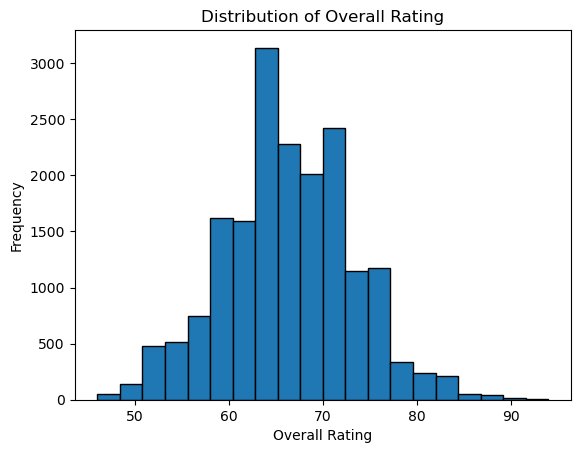

In [71]:
# Plot the distribution of Overall rating
plt.hist(df['Overall'], bins=20, edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Rating')
plt.show()

11. Retrieve the names of top20 players based on the Overall rating

In [72]:
# Retrieve the names of the top 20 players based on Overall rating
top_20_players = df.nlargest(20, 'Overall')['Name']

# Print the names of the top 20 players
print(top_20_players)

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
Name: Name, dtype: object


12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [73]:
# Retrieve the top 20 players based on Overall rating
top_20_players = df.nlargest(20, 'Overall')

# Generate a DataFrame with all the information of the top 20 players
top_20_players_info = df[df['ID'].isin(top_20_players['ID'])]

# Print the DataFrame with all the information of the top 20 players
print(top_20_players_info)

        ID               Name  Age  \
0   158023           L. Messi   31   
1    20801  Cristiano Ronaldo   33   
2   190871          Neymar Jr   26   
3   193080             De Gea   27   
4   192985       K. De Bruyne   27   
5   183277          E. Hazard   27   
6   177003          L. Modrić   32   
7   176580          L. Suárez   31   
8   155862       Sergio Ramos   32   
9   200389           J. Oblak   25   
10  188545     R. Lewandowski   29   
11  182521           T. Kroos   28   
12  182493           D. Godín   32   
13  168542        David Silva   32   
14  215914           N. Kanté   27   
15  211110          P. Dybala   24   
16  202126            H. Kane   24   
17  194765       A. Griezmann   27   
18  192448      M. ter Stegen   26   
19  192119        T. Courtois   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  

13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11) 

In [78]:
# Calculate the average Age and Wage of the top 20 players
average_age = top_20_players_info['Age'].mean()
print("Average Age:", average_age)

Average Age: 28.3


In [82]:

# Remove non-numeric characters from wage values
top_20_players_info['Wage'] = top_20_players_info['Wage'].str.replace('€', '')  # Remove euro symbol
top_20_players_info['Wage'] = top_20_players_info['Wage'].str.replace('K', '')  # Remove 'K'

# Extract numeric part of wage values using regular expressions
top_20_players_info['Wage'] = top_20_players_info['Wage'].str.extract(r'(\d+)').astype(int)

# Calculate the average Wage of the top 20 players
average_wage = top_20_players_info['Wage'].mean()

# Print the average Wage
print("Average Wage:", average_wage)



Average Wage: 289.7


14. Among the top 20 players based on the Overall rating, which player has the highest wage? 
Display the name of the player with his wage. 

In [83]:
# Find the index of the player with the highest wage
highest_wage_index = top_20_players_info['Wage'].idxmax()

# Get the name and wage of the player with the highest wage
highest_wage_player_name = top_20_players_info.loc[highest_wage_index, 'Name']
highest_wage_player_wage = top_20_players_info.loc[highest_wage_index, 'Wage']

# Display the name of the player with his wage
print("Player with the highest wage:")
print("Name:", highest_wage_player_name)
print("Wage:", highest_wage_player_wage)

Player with the highest wage:
Name: L. Messi
Wage: 565


15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'
    i) find the average Overall rating for each club.  - ii) Display the average overall rating of Top10 Clubs using a plot

In [89]:
 # Select the required columns
df_selected = df[['Name', 'Club', 'Wage', 'Overall']]

# Display the dataframe
df_selected.head()

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,€565K,94
1,Cristiano Ronaldo,Juventus,€405K,94
2,Neymar Jr,Paris Saint-Germain,€290K,92
3,De Gea,Manchester United,€260K,91
4,K. De Bruyne,Manchester City,€355K,91


In [91]:
# Group by 'Club Name' and calculate the average of 'Overall rating'
average_ratings = df.groupby('Club')['Overall'].mean()

# Display the average ratings
average_ratings.head()

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
Name: Overall, dtype: float64

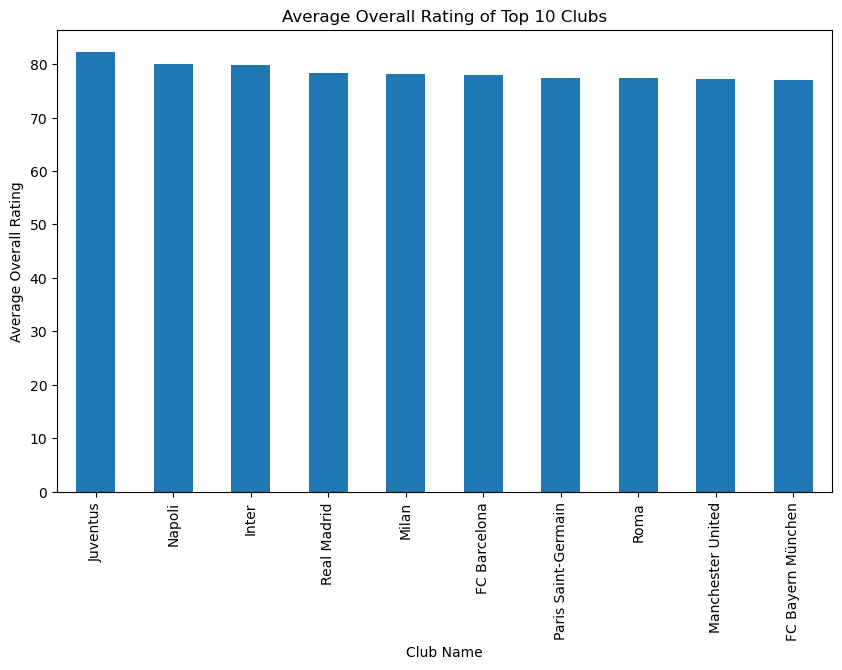

In [92]:
# Sort the average ratings in descending order and select the top 10 clubs
top_10_clubs = average_ratings.sort_values(ascending=False).head(10)

# Plot the average ratings
plt.figure(figsize=(10, 6))
top_10_clubs.plot(kind='bar')
plt.xlabel('Club Name')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating of Top 10 Clubs')
plt.show()

16. What is the relationship between age and individual potential of the player? Visualize the relationship
with appropriate plot and Comment on the same. 

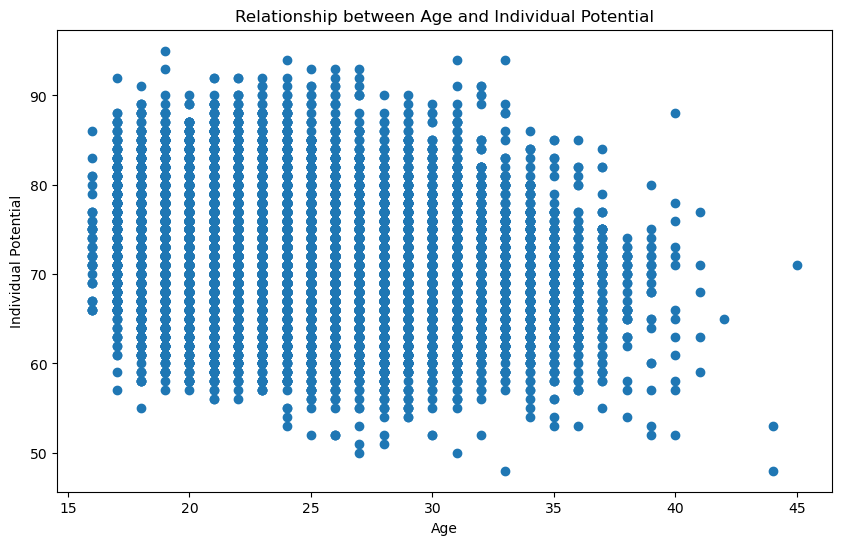

In [93]:
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with the required columns

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Potential'])
plt.xlabel('Age')
plt.ylabel('Individual Potential')
plt.title('Relationship between Age and Individual Potential')
plt.show()

In [94]:
correlation = df['Age'].corr(df['Potential'])
print('Correlation coefficient:', correlation)

Correlation coefficient: -0.2533121074109556


In [ ]:
The correlation coefficient ranges from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation,
and 1 indicates a strong positive correlation. By examining the correlation coefficient, it is a small corelation

17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (hint: use
potential, Overall, value, international reputation, and Release Clause)

In [116]:
# Convert the 'Wage' column to string
df['Wage'] = df['Wage'].astype(str)

# Remove non-numeric characters from the 'Wage' column
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('K', 'e3').str.replace('M', 'e6')

# Convert the 'Wage' column to float
df['Wage'] = df['Wage'].astype(float)

# Check the updated 'Wage' column
print(df['Wage'])

0        0.565
1        0.405
2        0.290
3        0.260
4        0.355
         ...  
18202    0.001
18203    0.001
18204    0.001
18205    0.001
18206    0.001
Name: Wage, Length: 18207, dtype: float64


In [117]:
# Convert the 'Valuee' column to string
df['Value'] = df['Value'].astype(str)

# Remove non-numeric characters from the 'Value' column
df['Value'] = df['Value'].str.replace('€', '').str.replace('K', 'e3').str.replace('M', 'e6')

# Convert the 'Value' column to float
df['Value'] = df['Value'].astype(float)

# Check the updated 'Value' column
print(df['Value'])

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64


In [119]:
# Convert the 'Release Clause' column to string
df['Release Clause'] = df['Release Clause'].astype(str)

# Remove non-numeric characters from the 'Release Clause' column
df['Release Clause'] = df['Release Clause'].str.replace('€', '').str.replace('K', 'e3').str.replace('M', 'e6')

# Convert the 'Release Clause' column to float
df['Release Clause'] = df['Release Clause'].astype(float)

# Check the updated 'Release Clause' column
print(df['Release Clause'])

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64


<module 'matplotlib.pyplot' from 'C:\\Users\\my\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

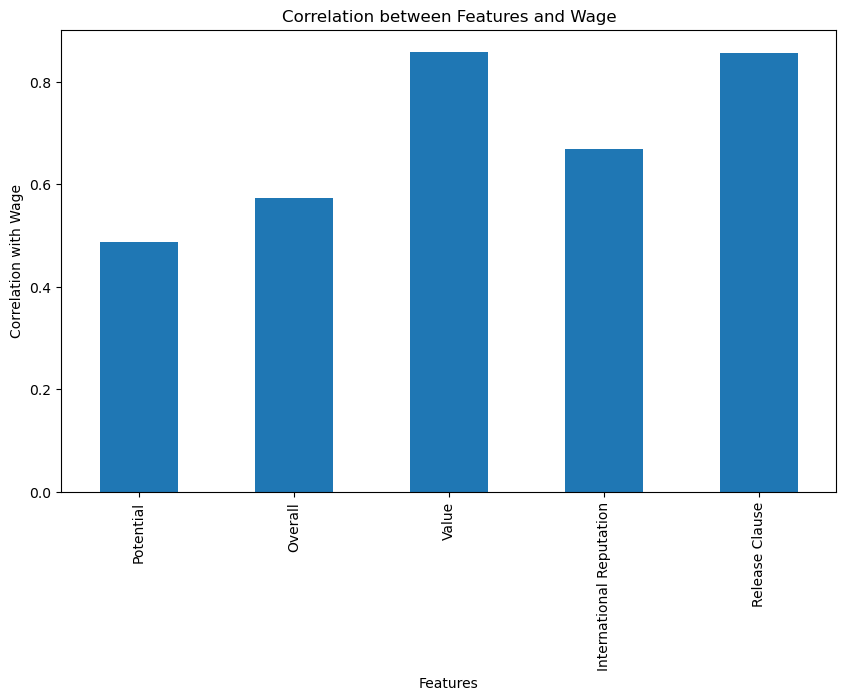

In [120]:

# Calculate the correlation matrix
correlation_matrix = df[selected_features + ['Wage']].corr()

# Create a bar plot
plt.figure(figsize=(10, 6))
correlation_matrix['Wage'].drop('Wage').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Wage')
plt.title('Correlation between Features and Wage')
plt

18. Find the position in the pitch where the maximum number of playersplay and the position where the minimum
number of players play? Display it using a plot.

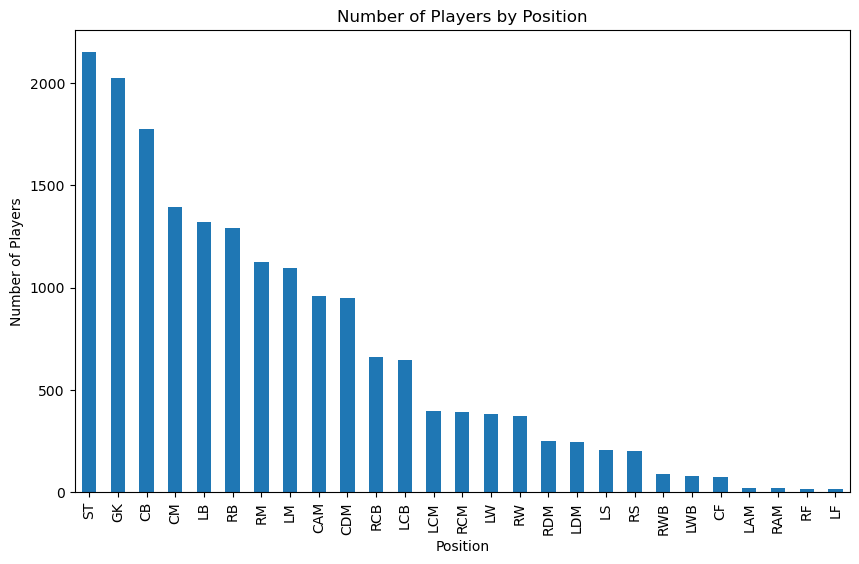

In [121]:
# Count the occurrences of each position
position_counts = df['Position'].value_counts()

# Find the position with the maximum number of players
max_position = position_counts.idxmax()

# Find the position with the minimum number of players
min_position = position_counts.idxmin()

# Create a bar plot
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players by Position')
plt.show()

19. How many players are from the club 'Juventus' and the wage is greaterthan 200K? Display all the information of
such players. 

In [122]:
# Filter the DataFrame for players from the club 'Juventus' with wage greater than 200K
juventus_players = df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]

# Display all the information of the selected players
print(juventus_players)

Empty DataFrame
Columns: [ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause]
Index: []

[0 rows x 60 columns]
